<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

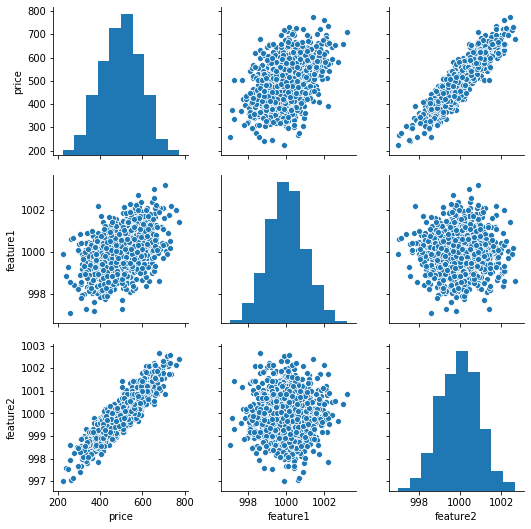

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [13]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [14]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [19]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [20]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 721us/step - loss: 256570.1562
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256389.0469
Epoch 3/250
22/22 [==============================] - 0s 972us/step - loss: 256211.5156
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256035.8125
Epoch 5/250
22/22 [==============================] - 0s 840us/step - loss: 255853.4219
Epoch 6/250
22/22 [==============================] - 0s 896us/step - loss: 255654.7812
Epoch 7/250
22/22 [==============================] - 0s 937us/step - loss: 255438.3594
Epoch 8/250
22/22 [==============================] - 0s 960us/step - loss: 255202.2656
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254943.7969
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254664.0156
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254360.1094
Epoch 12/250
22/22 [==============================]

22/22 [==============================] - 0s 1ms/step - loss: 20255.8984
Epoch 96/250
22/22 [==============================] - 0s 950us/step - loss: 17117.2676
Epoch 97/250
22/22 [==============================] - 0s 990us/step - loss: 14252.4600
Epoch 98/250
22/22 [==============================] - 0s 950us/step - loss: 11659.6846
Epoch 99/250
22/22 [==============================] - 0s 890us/step - loss: 9355.9824
Epoch 100/250
22/22 [==============================] - 0s 883us/step - loss: 7364.5630
Epoch 101/250
22/22 [==============================] - 0s 971us/step - loss: 5686.7144
Epoch 102/250
22/22 [==============================] - 0s 961us/step - loss: 4378.5308
Epoch 103/250
22/22 [==============================] - 0s 901us/step - loss: 3385.6589
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 2774.9917
Epoch 105/250
22/22 [==============================] - 0s 987us/step - loss: 2479.5491
Epoch 106/250
22/22 [==============================] - 0s 965

Epoch 190/250
22/22 [==============================] - 0s 1ms/step - loss: 497.3673
Epoch 191/250
22/22 [==============================] - 0s 1ms/step - loss: 481.0302
Epoch 192/250
22/22 [==============================] - 0s 927us/step - loss: 464.4981
Epoch 193/250
22/22 [==============================] - 0s 930us/step - loss: 446.7394
Epoch 194/250
22/22 [==============================] - 0s 984us/step - loss: 431.5420
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 415.7259
Epoch 196/250
22/22 [==============================] - 0s 959us/step - loss: 401.8607
Epoch 197/250
22/22 [==============================] - 0s 970us/step - loss: 386.6098
Epoch 198/250
22/22 [==============================] - 0s 904us/step - loss: 372.6451
Epoch 199/250
22/22 [==============================] - 0s 895us/step - loss: 356.8646
Epoch 200/250
22/22 [==============================] - 0s 961us/step - loss: 343.8015
Epoch 201/250
22/22 [==============================] - 0s 1m

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [21]:
model.history.history

{'loss': [256570.15625,
  256389.046875,
  256211.515625,
  256035.8125,
  255853.421875,
  255654.78125,
  255438.359375,
  255202.265625,
  254943.796875,
  254664.015625,
  254360.109375,
  254029.078125,
  253669.515625,
  253280.796875,
  252860.34375,
  252408.546875,
  251922.0625,
  251396.1875,
  250832.234375,
  250229.34375,
  249582.5625,
  248894.828125,
  248159.5625,
  247380.53125,
  246546.875,
  245661.59375,
  244729.421875,
  243738.875,
  242686.71875,
  241582.15625,
  240412.140625,
  239175.765625,
  237873.59375,
  236505.765625,
  235074.0625,
  233567.21875,
  231990.75,
  230338.5625,
  228604.484375,
  226797.765625,
  224913.78125,
  222948.734375,
  220892.25,
  218752.75,
  216532.09375,
  214224.875,
  211826.96875,
  209330.703125,
  206761.984375,
  204097.375,
  201327.265625,
  198468.65625,
  195517.9375,
  192484.921875,
  189338.546875,
  186104.140625,
  182785.625,
  179367.203125,
  175847.53125,
  172238.484375,
  168530.234375,
  164741.3437

In [22]:
loss = model.history.history['loss']

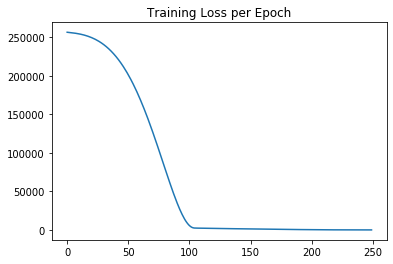

In [23]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [24]:
model.metrics_names

['loss']

In [25]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [26]:
training_score

25.156694412231445

In [27]:
test_score

26.385560989379883

### Further Evaluations

In [28]:
test_predictions = model.predict(X_test)

In [29]:
test_predictions

array([[406.9358 ],
       [622.8331 ],
       [591.60315],
       [572.43964],
       [369.38132],
       [579.05566],
       [516.1978 ],
       [459.89822],
       [549.6938 ],
       [448.37976],
       [611.1887 ],
       [548.3482 ],
       [420.65042],
       [410.64124],
       [649.5057 ],
       [438.4029 ],
       [508.4059 ],
       [659.43274],
       [661.7137 ],
       [565.17706],
       [337.00027],
       [446.0972 ],
       [384.6838 ],
       [380.6559 ],
       [566.55206],
       [610.3932 ],
       [532.77124],
       [429.19714],
       [654.8095 ],
       [415.35815],
       [443.60968],
       [485.91107],
       [439.65112],
       [680.83215],
       [425.7364 ],
       [419.49564],
       [501.7825 ],
       [550.4991 ],
       [510.79483],
       [397.7771 ],
       [617.7842 ],
       [417.9478 ],
       [603.82074],
       [446.67123],
       [502.6064 ],
       [580.69714],
       [667.24133],
       [490.85864],
       [320.84177],
       [486.2769 ],


In [30]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [31]:
pred_df

Test Y
0    402.296319
1    624.156198
2    582.455066
3    578.588606
4    371.224104
5    584.381108
6    514.405641
7    464.115870
8    551.650100
9    451.804172
10   613.959953
11   547.731982
12   428.316149
13   413.841780
14   654.839121
15   429.214520
16   512.049049
17   657.718680
18   674.311020
19   565.191846
20   338.090239
21   450.976072
22   375.137547
23   379.109821
24   562.057936
25   593.667796
26   531.277547
27   423.654533
28   656.654745
29   412.906877
..          ...
270  564.368224
271  444.944734
272  529.719716
273  375.959380
274  505.747264
275  633.350292
276  491.551287
277  568.604778
278  468.356980
279  273.432638
280  512.583778
281  618.123417
282  354.928842
283  448.632406
284  504.693896
285  543.323784
286  612.470256
287  383.934416
288  449.458484
289  478.048118
290  594.840477
291  491.037734
292  315.518929
293  560.937791
294  443.397036
295  525.704657
296  502.909473
297  612.727910
298  417.569725
299  410.538250

[300 rows x 1 columns]

In [32]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [33]:
test_predictions

0      406.935791
1      622.833130
2      591.603149
3      572.439636
4      369.381317
5      579.055664
6      516.197815
7      459.898224
8      549.693787
9      448.379761
10     611.188721
11     548.348206
12     420.650421
13     410.641235
14     649.505676
15     438.402893
16     508.405914
17     659.432739
18     661.713684
19     565.177063
20     337.000275
21     446.097198
22     384.683807
23     380.655914
24     566.552063
25     610.393188
26     532.771240
27     429.197144
28     654.809509
29     415.358154
          ...    
270    563.786743
271    449.174133
272    534.490967
273    383.577209
274    502.034332
275    636.579834
276    496.654022
277    568.543579
278    471.328949
279    275.655731
280    518.099304
281    620.867065
282    352.768921
283    452.129181
284    500.202820
285    543.181458
286    610.969971
287    390.588531
288    451.163879
289    483.070160
290    598.074585
291    500.543732
292    323.995117
293    555.221313
294    445

In [34]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [35]:
pred_df.columns = ['Test Y','Model Predictions']

In [36]:
pred_df

Test Y  Model Predictions
0    402.296319         406.935791
1    624.156198         622.833130
2    582.455066         591.603149
3    578.588606         572.439636
4    371.224104         369.381317
5    584.381108         579.055664
6    514.405641         516.197815
7    464.115870         459.898224
8    551.650100         549.693787
9    451.804172         448.379761
10   613.959953         611.188721
11   547.731982         548.348206
12   428.316149         420.650421
13   413.841780         410.641235
14   654.839121         649.505676
15   429.214520         438.402893
16   512.049049         508.405914
17   657.718680         659.432739
18   674.311020         661.713684
19   565.191846         565.177063
20   338.090239         337.000275
21   450.976072         446.097198
22   375.137547         384.683807
23   379.109821         380.655914
24   562.057936         566.552063
25   593.667796         610.393188
26   531.277547         532.771240
27   423.654533         429.197144
28   656.654745         654.809509
29   412.906877         415.358154
..          ...                ...
270  564.368224         563.786743
271  444.944734         449.174133
272  529.719716         534.490967
273  375.959380         383.577209
274  505.747264         502.034332
275  633.350292         636.579834
276  491.551287         496.654022
277  568.604778         568.543579
278  468.356980         471.328949
279  273.432638         275.655731
280  512.583778         518.099304
281  618.123417         620.867065
282  354.928842         352.768921
283  448.632406         452.129181
284  504.693896         500.202820
285  543.323784         543.181458
286  612.470256         610.969971
287  383.934416         390.588531
288  449.458484         451.163879
289  478.048118         483.070160
290  594.840477         598.074585
291  491.037734         500.543732
292  315.518929         323.995117
293  560.937791         555.221313
294  443.397036         445.815613
295  525.704657         529.670166
296  502.909473         516.203552
297  612.727910         609.015259
298  417.569725         418.145447
299  410.538250         412.730408

[300 rows x 2 columns]

Let's compare to the real test labels!

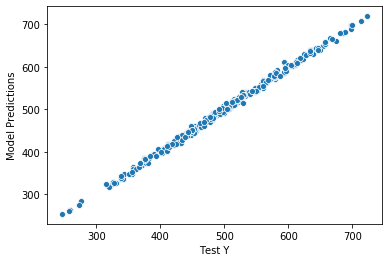

In [37]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [38]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

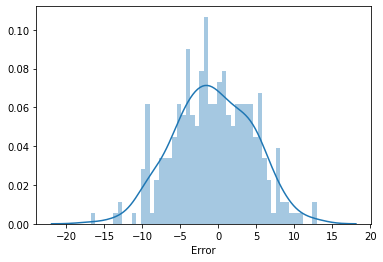

In [39]:
sns.distplot(pred_df['Error'],bins=50)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.178180012481488

In [42]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

26.385565141081305

In [43]:
# Essentially the same thing, difference just due to precision
test_score

26.385560989379883

In [44]:
#RMSE
test_score**0.5

5.136687744975344

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [45]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [46]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [47]:
new_gem = scaler.transform(new_gem)

In [48]:
model.predict(new_gem)

array([[421.82977]], dtype=float32)

## Saving and Loading a Model

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [51]:
later_model = load_model('my_model.h5')

In [52]:
later_model.predict(new_gem)

array([[421.82977]], dtype=float32)